In [2]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 

#### Read Clinical data

In [3]:
synthetic = pd.read_csv("data/synthetic_data.csv")
print(synthetic.columns)

Index(['Patient ID', 'Address Line 1', 'Address Line 2', 'Suburb', 'State',
       'Postal Code', 'Country', 'Gender', 'Occupation', 'Date of Birth',
       'Marital Status', 'Dependents', 'Income Range'],
      dtype='object')


### Data overview

In [4]:
synthetic.head(10)

,Patient ID,Address Line 1,Address Line 2,Suburb,State,Postal Code,Country,Gender,Occupation,Date of Birth,Marital Status,Dependents,Income Range
0,PAT-81562,38 North Street,NaN,Kensington,Victoria,3207,Australia,Other,Doctor,25/5/1989,Divorced,0,"60,000-90,000"
1,PAT-19979,2434 East Street,NaN,Flemington,Victoria,3051,Australia,Male,Clerk,12/12/1945,Divorced,5,"<30,000"
2,PAT-46207,2076 South Street,NaN,Carlton,Victoria,3205,Australia,Other,Clerk,22/3/1968,Widowed,0,">120,000"
3,PAT-18227,4883 North Street,Apt 722,Elwood,Victoria,3078,Australia,Prefer Not to Say,Teacher,20/7/2000,Widowed,0,">120,000"
4,PAT-36796,8573 West Street,NaN,Port Melbourne,Victoria,3052,Australia,Other,Unemployed,13/8/1959,Divorced,3,"30,000-60,000"
5,PAT-73672,2178 East Street,NaN,Collingwood,Victoria,3054,Australia,Prefer Not to Say,Doctor,21/10/1962,Widowed,4,"30,000-60,000"
6,PAT-80999,5959 East Street,NaN,Clifton Hill,Victoria,3206,Australia,Other,Clerk,13/3/1952,Widowed,4,">120,000"
7,PAT-86476,5498 West Street,Apt 216,Clifton Hill,Victoria,3006,Australia,Female,Unemployed,15/6/1972,Widowed,0,"<30,000"
8,PAT-83620,6589 North Street,Apt 524,South Melbourne,Victoria,3053,Australia,Female,Teacher,28/10/1938,Widowed,3,"<30,000"
9,PAT-51082,8981 West Street,Apt 376,Parkville,Victoria,3121,Australia,Prefer Not to Say,Teacher,29/3/1970,Single,4,"30,000-60,000"


In [5]:
# Get the dimensions
num_rows, num_columns = synthetic.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1000
Number of columns: 13


In [6]:
synthetic.Suburb.unique()

array(['Kensington', 'Flemington', 'Carlton', 'Elwood', 'Port Melbourne',
       'Collingwood', 'Clifton Hill', 'South Melbourne', 'Parkville',
       'Princes Hill', 'Burnley', 'Southbank', 'Richmond', 'Docklands',
       'Balaclava', 'Melbourne', 'Fairfield', 'Middle Park',
       'St Kilda West', 'South Yarra', 'North Melbourne', 'Fitzroy',
       'Carlton North', 'Fitzroy North', 'East Melbourne', 'South Wharf',
       'Ripponlea', 'Albert Park', 'Alphington', 'West Melbourne',
       'Abbotsford', 'Cremorne', 'St Kilda', 'St Kilda East'],
      dtype=object)

In [7]:
synthetic.groupby('Occupation').size()

Occupation
Chef          167
Clerk         164
Doctor        180
Engineer      166
Teacher       158
Unemployed    165
dtype: int64

In [8]:
synthetic.groupby('Income Range').size()

Income Range
30,000-60,000     199
60,000-90,000     171
90,000-120,000    213
<30,000           209
>120,000          208
dtype: int64

In [9]:
synthetic.groupby('Gender').size()

Gender
Female               237
Male                 245
Other                258
Prefer Not to Say    260
dtype: int64

In [10]:
# Descriptive Statistics for numeric df
# synthetic.describe()

#### Check Null value

In [11]:
synthetic.isnull().sum()

Patient ID          0
Address Line 1      0
Address Line 2    506
Suburb              0
State               0
Postal Code         0
Country             0
Gender              0
Occupation          0
Date of Birth       0
Marital Status      0
Dependents          0
Income Range        0
dtype: int64

**there is one column contains the Null value. Adress Line 2 is not the key variable in our case, hence, we can ignore it for now.**

### Prepare to plot the Choropleth map

In [12]:
# We observe the ratio of low income to total number of patients

# Gave up: synthetic.groupby(['Income Range', 'Gender', 'Occupation']).size().to_frame(name='Ratio')
# Due to MultiIndex column headers, need to flatten

synthetic_low = synthetic[synthetic["Income Range"] == "<30,000"]
counts_on_groupby = synthetic_low.groupby(['Suburb', 'Gender'])['Income Range'].size()
total_count = counts_on_groupby.sum()

ratio_groupby = counts_on_groupby/total_count
ratio_df = ratio_groupby.reset_index(name='Ratio')

ratio_df.head(5)

,Suburb,Gender,Ratio
0,Abbotsford,Other,0.004785
1,Abbotsford,Prefer Not to Say,0.009569
2,Albert Park,Female,0.004785
3,Albert Park,Prefer Not to Say,0.004785
4,Alphington,Female,0.028708


**Seperate the data by State, gender and only calculate the ratio of low income range, < 30,000 dollar in Australia.**

In [13]:
female_ratio = ratio_df[ratio_df["Gender"] == "Female"]
male_ratio = ratio_df[ratio_df["Gender"] == "Male"]
rest_ratio = ratio_df[~ratio_df["Gender"].isin(["Female", "Male"])]

Ratio of low income to total number of patients by Australian suburb


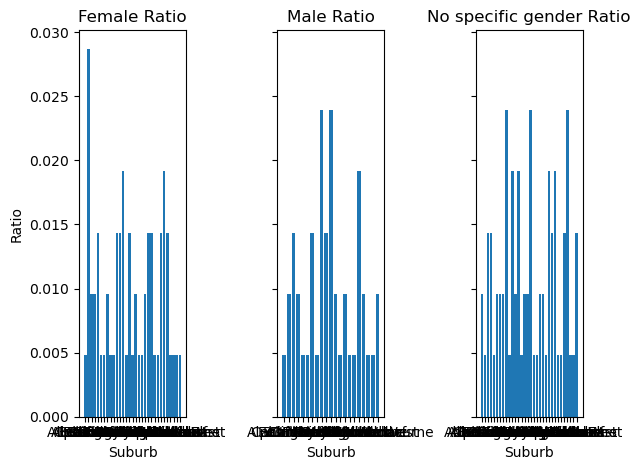

In [14]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=False)
print("Ratio of low income to total number of patients by Australian suburb")
axs[0].bar(female_ratio.Suburb, female_ratio.Ratio)
axs[0].set_title('Female Ratio')
axs[0].set_xlabel('Suburb')
axs[0].set_ylabel('Ratio')
axs[1].bar(male_ratio.Suburb, male_ratio.Ratio)
axs[1].set_title('Male Ratio')
axs[1].set_xlabel('Suburb')
axs[2].bar(rest_ratio.Suburb, rest_ratio.Ratio)
axs[2].set_title('No specific gender Ratio')
axs[2].set_xlabel('Suburb')
plt.show()

In [15]:
"""
# plot distribution of the ratio
import numpy as np
counts, bins = np.histogram(ratio_df.Ratio)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.title('Ratio of low income to total number of patients')
plt.show()
"""

"\n# plot distribution of the ratio\nimport numpy as np\ncounts, bins = np.histogram(ratio_df.Ratio)\nplt.hist(bins[:-1], bins, weights=counts)\nplt.xlabel('Ratio')\nplt.ylabel('Count')\nplt.title('Ratio of low income to total number of patients')\nplt.show()\n"

### Plot Choropleth Map

In [16]:
# Import the geopandas and geoplot libraries
import geoplot as gplt

# Load the json file with county coordinates
# geoData = gpd.read_file('https://data.gov.au/geoserver/vic-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_af33dd8c_0534_4e18_9245_fc64440f742e&outputFormat=json')

geodata = gpd.read_file("data/GDA2020/vic_localities.shp")

In [17]:
# Check the missing values
geodata.isna().sum()

LC_PLY_PID    0
LOC_PID       0
DT_CREATE     0
LOC_NAME      0
LOC_CLASS     0
STATE         0
geometry      0
dtype: int64

In [18]:
# Merge clinical data and geographicial data
fullData = geodata.merge(ratio_df, left_on=['LOC_NAME'], right_on=['Suburb'])
fullData.head(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,Suburb,Gender,Ratio
0,lcp386f2bcf9bce,locb9872f35df41,2021-06-24,Abbotsford,Gazetted Locality,VIC,"POLYGON ((145.00235 -37.80722, 145.00350 -37.8...",Abbotsford,Other,0.004785
1,lcp386f2bcf9bce,locb9872f35df41,2021-06-24,Abbotsford,Gazetted Locality,VIC,"POLYGON ((145.00235 -37.80722, 145.00350 -37.8...",Abbotsford,Prefer Not to Say,0.009569


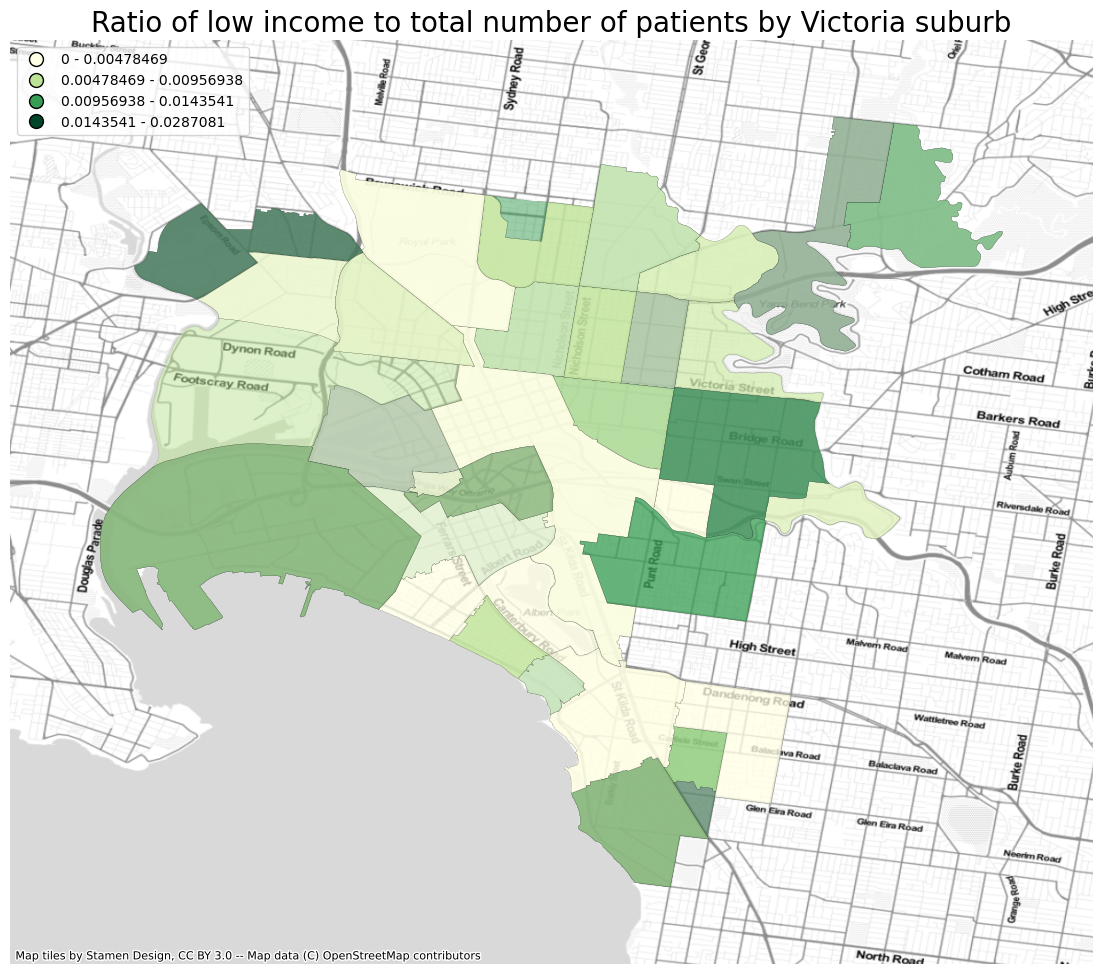

In [26]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
import contextily as ctx



scheme = mc.Quantiles(fullData['Ratio'], k=4)

# Map
gplt.choropleth(fullData, 
    hue="Ratio", 
    linewidth=.1,
    scheme=scheme, 

    cmap='YlGn', #yellow to green colour palette
    legend=True,
    edgecolor='black',
    alpha=0.5,
    ax=ax
);
# cmap='inferno_r',
# Add a background map of Victoria using contextily
ctx.add_basemap(ax, crs=fullData.crs.to_string(), source=ctx.providers.Stamen.TonerLite)


ax.set_title("Ratio of low income to total number of patients by Victoria suburb", fontsize=20);

In [22]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Previous ideas

In [33]:
# MultiPolygons on the geometry column
# Extract individual polygons from MultiPolygons
polygons = []
for geom in geoData['geometry']:
    if geom.geom_type == 'Polygon':
        polygons.append(geom)
    elif geom.geom_type == 'MultiPolygon':
        polygons.extend(geom.geoms)

# Create a GeoDataFrame from the extracted polygons
gdf_polygons = gpd.GeoDataFrame(geometry=polygons)


In [36]:
geoData.head(10)

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,NaN,VIC2615,2012-04-27,NaN,UNDERBOOL,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((141.74552 -35.07229, 141.74552..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,NaN,VIC1986,2012-04-27,NaN,NURRAN,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((148.66877 -37.39571, 148.66876..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,NaN,VIC2862,2012-04-27,NaN,WOORNDOO,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((142.92288 -37.97886, 142.90449..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,NaN,VIC734,2018-08-03,NaN,DEPTFORD,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((147.82336 -37.66001, 147.82313..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,NaN,VIC2900,2012-04-27,NaN,YANAC,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((141.27978 -35.99859, 141.27989..."
5,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.6,6405,2011-08-31,NaN,VIC1688,2012-04-27,NaN,MINIMAY,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((141.33075 -36.64113, 141.33050..."
6,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.7,6451,2011-08-31,NaN,VIC999,2012-04-27,NaN,GLEN FORBES,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((145.50393 -38.42934, 145.50827..."
7,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.8,6452,2011-08-31,NaN,VIC7,2012-04-27,NaN,ADAMS ESTATE,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((145.52914 -38.42198, 145.53074..."
8,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.9,11047,2018-06-05,NaN,VIC477,2018-08-03,NaN,CARAG CARAG,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((144.86800 -36.48444, 144.84989..."
9,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.10,6466,2011-08-31,NaN,VIC467,2012-04-27,NaN,CANNUM,NaN,NaN,G,NaN,2,"MULTIPOLYGON (((142.34152 -36.30394, 142.30726..."


KeyboardInterrupt: 

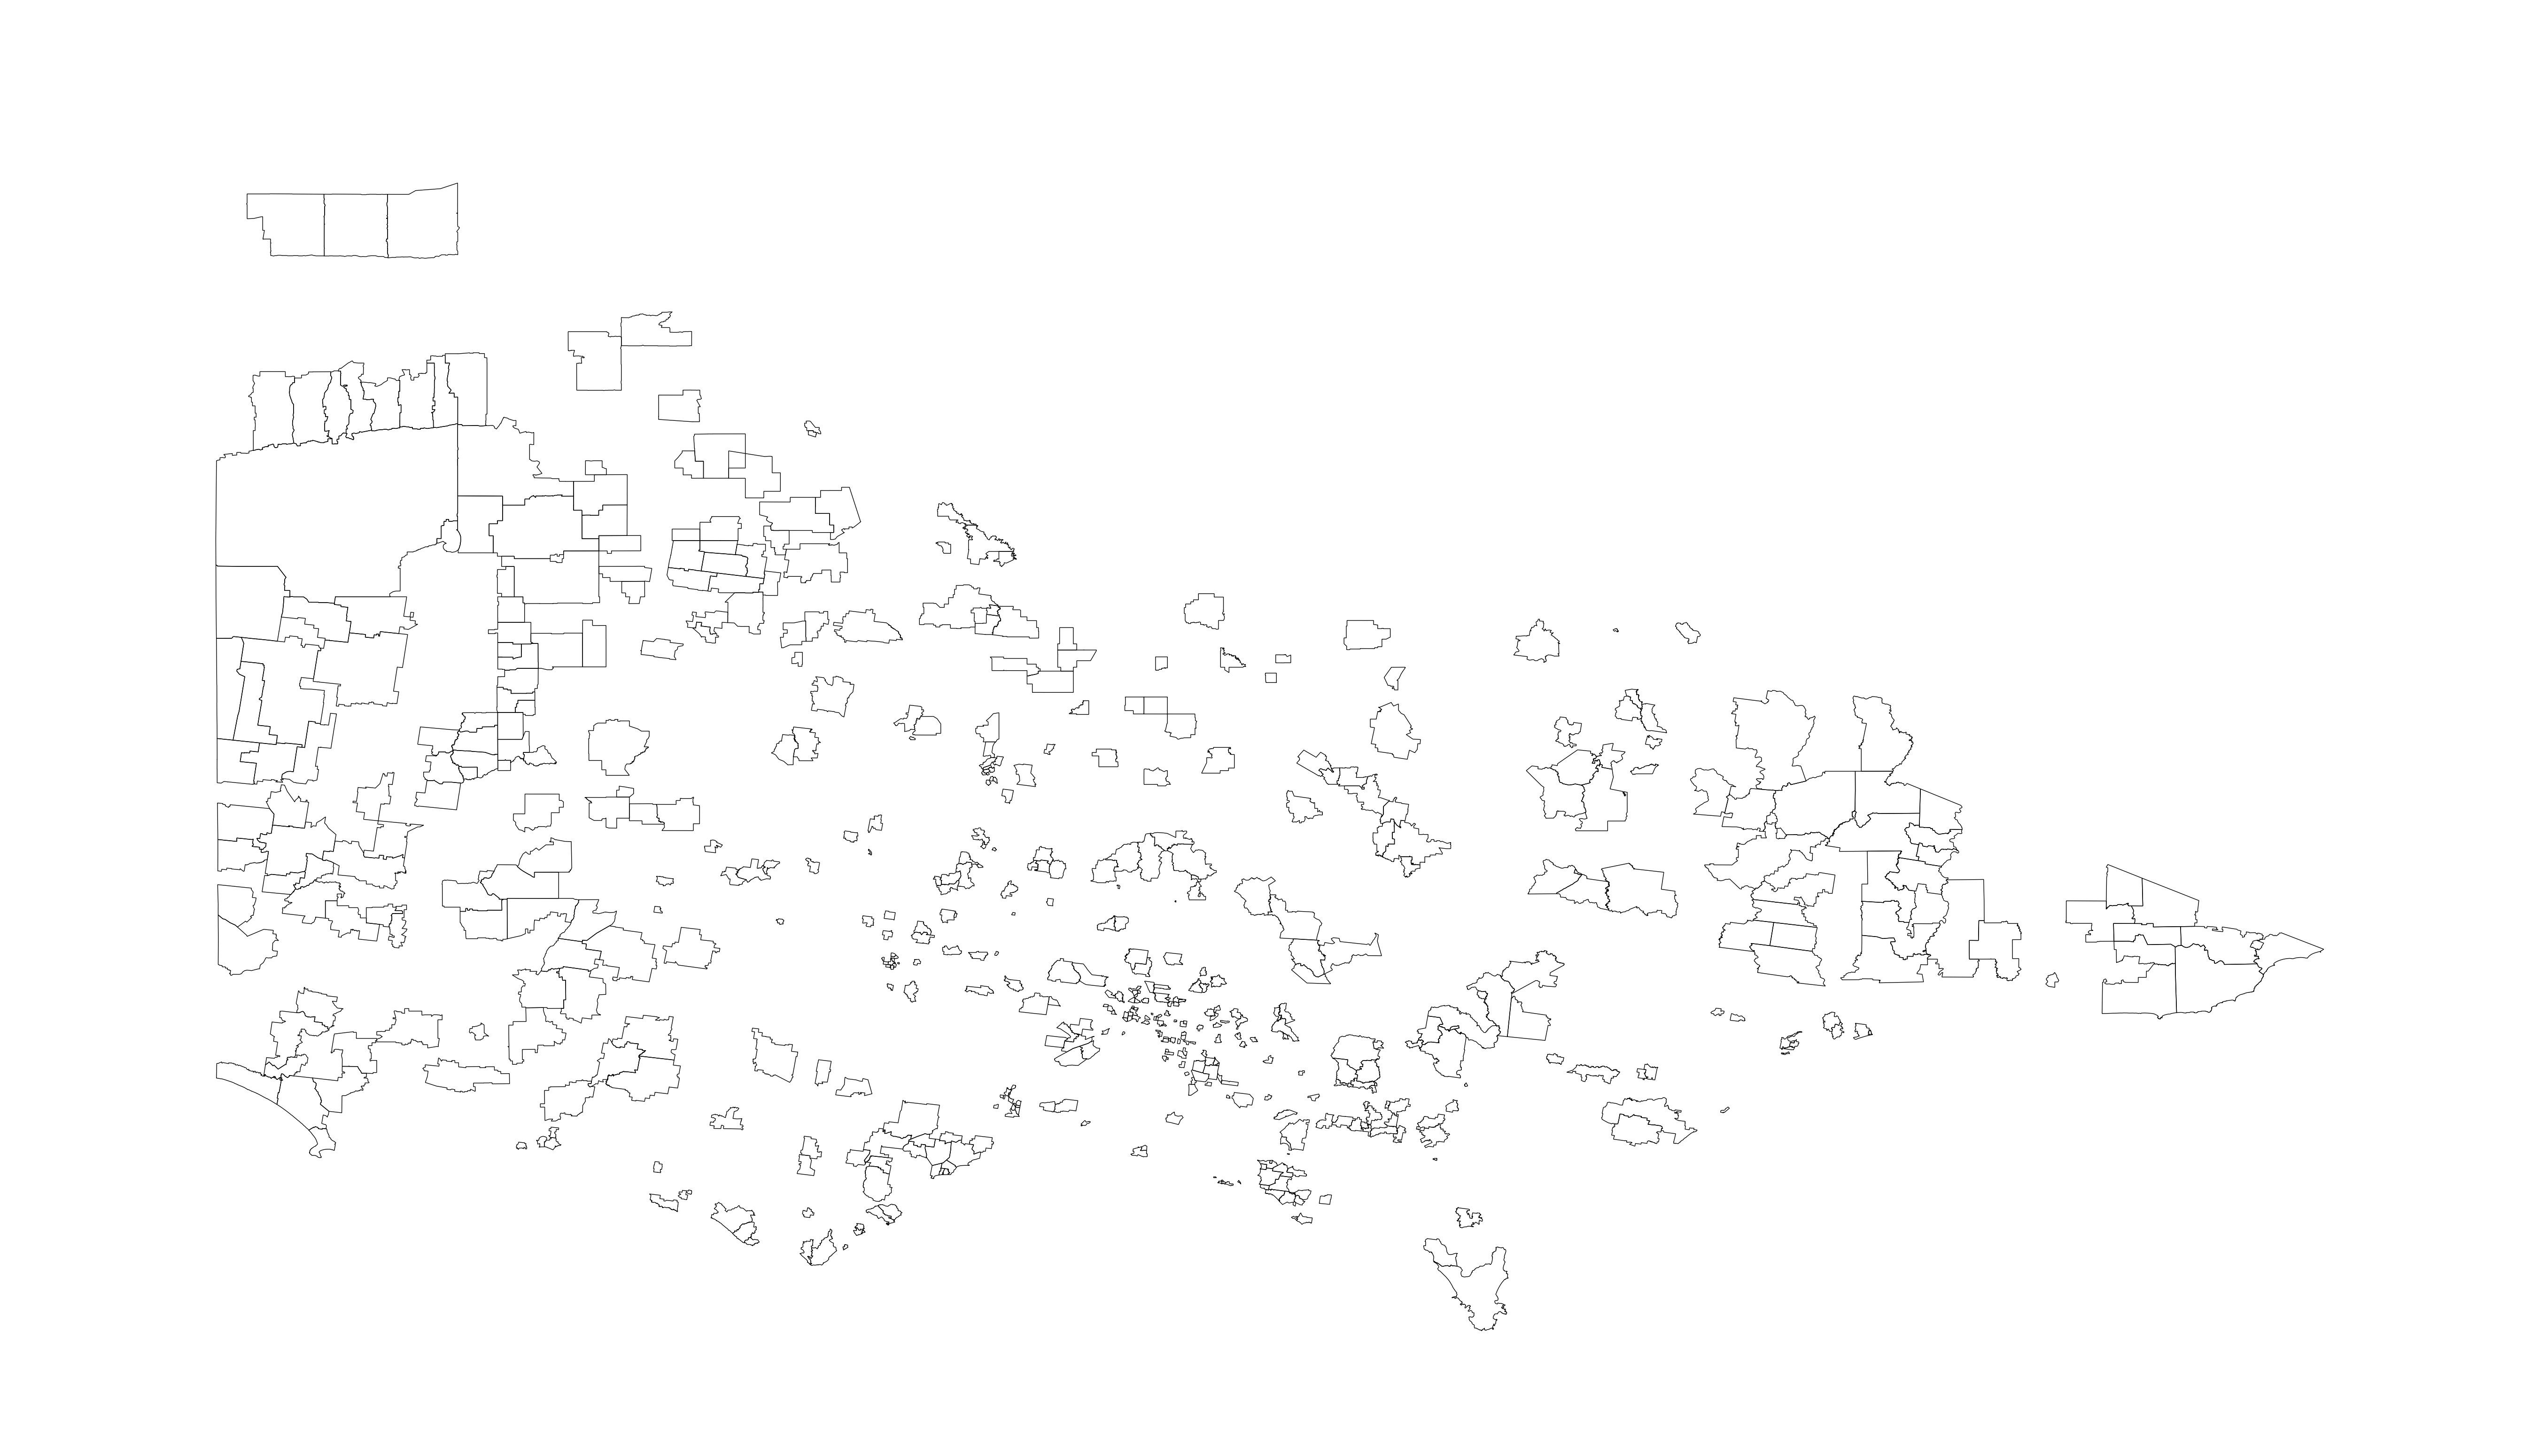

In [45]:
# Basic plot with just county outlines, smaller width, larger hight
gplt.polyplot(gdf_polygons, figsize=(80, 40))
plt.show()

In [29]:
pip install --upgrade pillow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
Note: you may need to restart the kernel to use updated packages.


#### Read social-economic data

In [55]:
sd_eco = pd.read_csv("data/SEIFA sa1 indexes CSV.csv")
sd_eco.columns

/var/folders/vt/3bwlqrgx039fhm0gqgx_mlyc0000gn/T/ipykernel_66349/348392328.py:1: DtypeWarning: Columns (2,3,4,5,8,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  sd_eco = pd.read_csv("data/SEIFA sa1 indexes CSV.csv")


Index(['Contents: Table 1', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [56]:
sd_eco.head(10)

,Contents: Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2033.0.55.001 Socio-Economic Indexes for Austr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 10.30am (Canberra time) 27 March 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Tables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1,"Statistical Area Level 1 (SA1) SEIFA Summary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2,Statistical Area Level 1 (SA1) Index of Relati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,3,Statistical Area Level 1 (SA1) Index of Relati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,4,Statistical Area Level 1 (SA1) Index of Econom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
